In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
#Load Datasets

## load Project Sunroof Data
sr_data = pd.read_csv("data/project-sunroof-census_tract.csv", index_col="region_name")
sr_data = sr_data.rename_axis(index={"region_name": "GEOID"})
sr_data.index = sr_data.index.astype(int)
#print(sr_data.head(5))

#load Energy Equity Project Data
eep_data = pd.read_csv("data/eep_final_data.csv", index_col="GEOID")
eep_data.index = eep_data.index.astype(int)
#print(eep_data.head(5))

#load Justice40 Data
j40_data = pd.read_csv("data/1.0-communities.csv", index_col="Census tract 2010 ID")
j40_data = j40_data.rename(columns={"Census tract 2010 ID": "GEOID"})
j40_data.index = j40_data.index.astype(int)
#print(j40_data.head(5))

#load Opportunity Zone Data
oz_data = pd.read_csv("data/Opportunity_Zone_ExportTable1.csv", index_col="Tract_Boundaries_ID")
oz_data = oz_data.rename(columns={"Tract_Boundaries_ID": "GEOID"})
oz_data.index = oz_data.index.astype(int)
#print(oz_data.head(5))

           state_name    lat_max    lat_min    lng_max    lng_min    lat_avg   
GEOID                                                                          
1001020100    Alabama  32.505161  32.449730 -86.475128 -86.510422  32.477184  \
1001020200    Alabama  32.489342  32.456120 -86.465378 -86.481270  32.474255   
1001020300    Alabama  32.491909  32.459209 -86.450684 -86.470871  32.475426   
1001020400    Alabama  32.493690  32.447208 -86.432381 -86.453941  32.472000   
1001020500    Alabama  32.485748  32.424000 -86.411346 -86.438423  32.458832   

              lng_avg  yearly_sunlight_kwh_kw_threshold_avg  count_qualified   
GEOID                                                                          
1001020100 -86.490082                               1095.65              591  \
1001020200 -86.473381                               1095.65              718   
1001020300 -86.460190                               1095.65             1121   
1001020400 -86.443619                  

/var/folders/67/r87g720s2653g554zdhtz1vh0000gn/T/ipykernel_5751/276775224.py:15: DtypeWarning: Columns (18,26,70,72,85,131) have mixed types. Specify dtype option on import or set low_memory=False.
  j40_data = pd.read_csv("data/1.0-communities.csv", index_col="Census tract 2010 ID")


In [4]:
#load Energy Equity Project geojson for geometry
eep_geodata = gpd.read_file("data/eep_final_simplified.json")

In [5]:
#Extract GEOID and Geometry to join into other datasets later
tract_geoid = eep_geodata[["GEOID", "geometry"]]
tract_geoid = tract_geoid.set_index("GEOID")
tract_geoid.index = tract_geoid.index.astype(int)
print(tract_geoid.head(5))

                                                      geometry
GEOID                                                         
13163960300  POLYGON ((-82.66192 33.12633, -82.66192 33.126...
37109071201  POLYGON ((-80.99344 35.47878, -80.99386 35.471...
25025050200  POLYGON ((-71.04003 42.37865, -71.03907 42.374...
17031230200  POLYGON ((-87.71342 41.91359, -87.71331 41.910...
41047001607  POLYGON ((-122.99032 44.96821, -122.99031 44.9...


<Axes: >

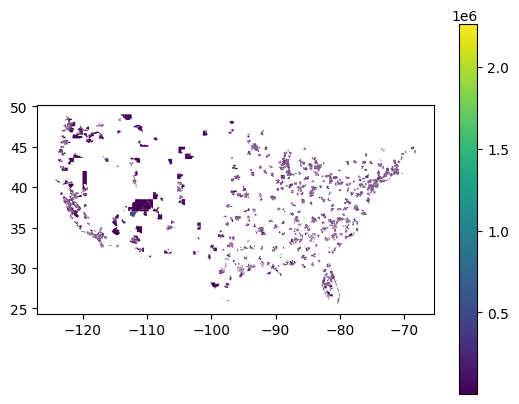

In [9]:
#Merge geometry attributes with solar project dataset
sr_geodata = tract_geoid.merge(sr_data, on="GEOID")
# print(sr_geodata.head(5))

#Map solar potential
sr_geodata.plot("yearly_sunlight_kwh_median", legend=True)

<Axes: >

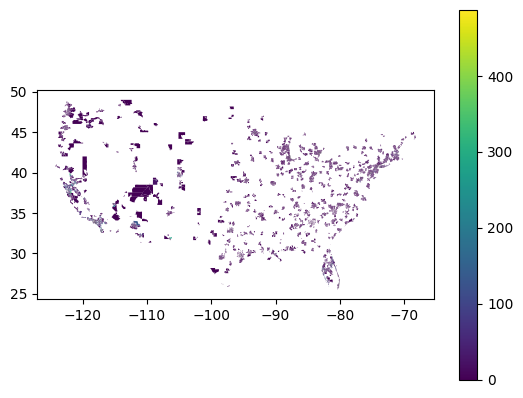

In [7]:
#Map existing installs
sr_geodata.plot("existing_installs_count", legend=True)

<Axes: >

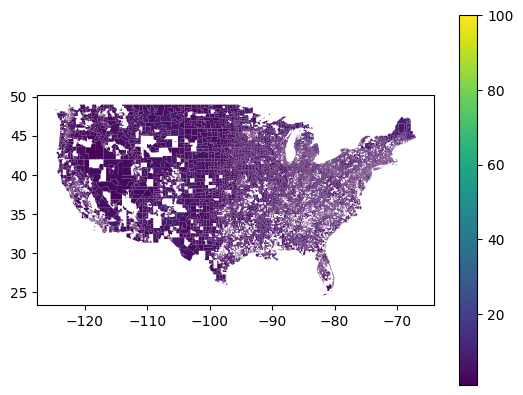

In [19]:
#Map energy burden
eep_geodata.plot("energy_burden", legend=True)